# Welcome to NLP Excercise

### Import all dependencies

In [1]:
pip install pydot==1.3.0

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install graphviz==0.10.1

Note: you may need to restart the kernel to use updated packages.


In [3]:
import tensorflow as tf
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from keras import callbacks
from keras.utils import plot_model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

### Import Dataset

In [4]:
df = pd.read_csv('./datasets/sentiment-labelled-datasets/yelp_labelled.txt', names=['sentence', 'label'], sep='\t')

In [5]:
df.tail()

,sentence,label
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


### Preprocessing

In [6]:
sentence = df['sentence'].values
label = df['label'].values
train_sentence, test_sentence, train_label, test_label = train_test_split(sentence, label, test_size=0.2)

### Create Tokenizer

In [7]:
tokenizer = Tokenizer(num_words=250, oov_token='x')

### Fit Sentence

In [8]:
tokenizer.fit_on_texts(train_sentence) 
tokenizer.fit_on_texts(test_sentence)

### Convert Text to Index

In [9]:
train_sequences = tokenizer.texts_to_sequences(train_sentence)
test_sequences = tokenizer.texts_to_sequences(test_sentence)

In [10]:
print(tokenizer.word_index)

{'x': 1, 'the': 2, 'and': 3, 'i': 4, 'was': 5, 'a': 6, 'to': 7, 'is': 8, 'this': 9, 'it': 10, 'of': 11, 'food': 12, 'not': 13, 'for': 14, 'in': 15, 'place': 16, 'good': 17, 'service': 18, 'we': 19, 'very': 20, 'my': 21, 'with': 22, 'had': 23, 'great': 24, 'that': 25, 'be': 26, 'so': 27, 'were': 28, 'are': 29, 'but': 30, 'have': 31, 'back': 32, 'you': 33, 'here': 34, 'they': 35, 'at': 36, 'on': 37, 'like': 38, 'go': 39, 'all': 40, 'time': 41, 'our': 42, 'will': 43, 'there': 44, 'really': 45, 'as': 46, 'just': 47, 'an': 48, 'their': 49, 'best': 50, 'if': 51, 'ever': 52, 'would': 53, 'friendly': 54, 'also': 55, 'only': 56, 'one': 57, 'never': 58, 'up': 59, 'restaurant': 60, 'no': 61, 'your': 62, 'nice': 63, 'out': 64, "don't": 65, 'amazing': 66, 'from': 67, 'what': 68, 'again': 69, 'been': 70, 'delicious': 71, 'did': 72, 'vegas': 73, 'which': 74, 'by': 75, 'came': 76, 'experience': 77, 'me': 78, "i'm": 79, "i've": 80, 'when': 81, 'some': 82, 'pretty': 83, 'even': 84, 'definitely': 85, 'st

### Padding

In [11]:
train_padded = pad_sequences(train_sequences) 
test_padded = pad_sequences(test_sequences)

### Create Model

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(250, 16, input_length=20),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [13]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 16)            4000      
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 4,433
Trainable params: 4,433
Non-trainable params: 0
_________________________________________________________________
None


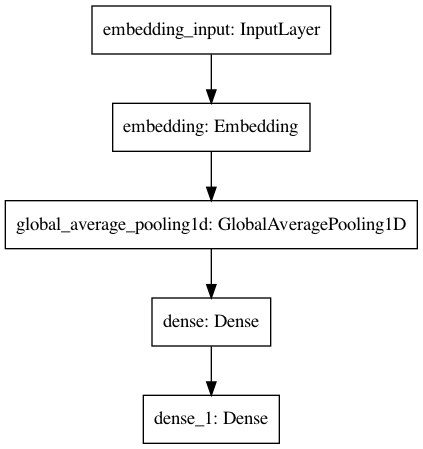

In [15]:
plot_model(model, to_file='08-NLP-excercise.png')

### Create Callbacks

In [16]:
class myCallback(callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nYour Accuracy >90%!")
      self.model.stop_training = True

In [17]:
callbacks = myCallback()

### Fit Model

In [18]:
history = model.fit(train_padded, train_label, epochs=50, 
                    validation_data=(test_padded, test_label), verbose=2, callbacks=[callbacks])

Epoch 1/50
25/25 - 0s - loss: 0.6928 - accuracy: 0.5100 - val_loss: 0.6933 - val_accuracy: 0.4550
Epoch 2/50
25/25 - 0s - loss: 0.6909 - accuracy: 0.5163 - val_loss: 0.6922 - val_accuracy: 0.4600
Epoch 3/50
25/25 - 0s - loss: 0.6880 - accuracy: 0.5113 - val_loss: 0.6911 - val_accuracy: 0.4650
Epoch 4/50
25/25 - 0s - loss: 0.6834 - accuracy: 0.6200 - val_loss: 0.6876 - val_accuracy: 0.5450
Epoch 5/50
25/25 - 0s - loss: 0.6768 - accuracy: 0.5688 - val_loss: 0.6828 - val_accuracy: 0.5900
Epoch 6/50
25/25 - 0s - loss: 0.6679 - accuracy: 0.6625 - val_loss: 0.6750 - val_accuracy: 0.6050
Epoch 7/50
25/25 - 0s - loss: 0.6550 - accuracy: 0.6988 - val_loss: 0.6685 - val_accuracy: 0.6400
Epoch 8/50
25/25 - 0s - loss: 0.6388 - accuracy: 0.7100 - val_loss: 0.6546 - val_accuracy: 0.6900
Epoch 9/50
25/25 - 0s - loss: 0.6185 - accuracy: 0.7462 - val_loss: 0.6383 - val_accuracy: 0.6950
Epoch 10/50
25/25 - 0s - loss: 0.5955 - accuracy: 0.7563 - val_loss: 0.6167 - val_accuracy: 0.7000
Epoch 11/50
25/25 -

### Plotting

#### Plot Model Loss

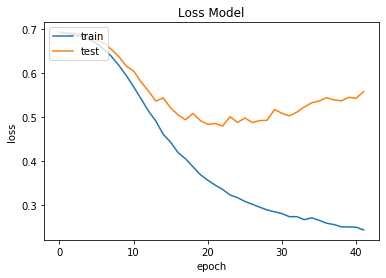

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Plot Model Accuracy

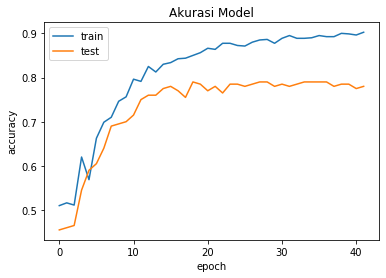

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()